# Green’s function estimation from ambient noise signals with limited illumination in 3D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## 1. 

Let $\tau \in \mathbb{R}$ be the time lag between two signals. 

$$\displaystyle 
\begin{aligned}
C_N(\tau,\mathbf{x}_j,\mathbf{x}_1) &= \frac{1}{2\pi N} \sum_{s=1}^{N} \int_{-\infty}^{\infty}  \hat{F}(\omega)\overline{\hat{G}(\omega,\mathbf{x}_j,\mathbf{y}_s)}\hat{G}(\omega,\mathbf{x}_1,\mathbf{y}_s)e^{-i\omega\tau} \mathrm{d}\omega \\
&=\frac{1}{16\pi^2N}\sum_{s=1}^{N} \frac{1}{|\mathbf{x}_j-\mathbf{y}_s||\mathbf{x}_1-\mathbf{y}_s|}\frac{1}{2\pi}\int_{-\infty}^{\infty} \omega^2e^{-\omega^2}\exp{\left(-i\omega\left(\frac{|\mathbf{x}_j-\mathbf{y}_s|-|\mathbf{x}_1-\mathbf{y}_s|}{c_0}+\tau\right)\right)} \mathrm{d}\omega
\end{aligned}
$$

Let's define $g : \left\{\begin{aligned} \mathbb{R} &\to \mathbb{R} \\ t &\mapsto \frac{1}{\sqrt{4\pi}}e^{-t^2/4} \end{aligned}\right.$. 

It is a standard result that the Fourier transform of $g$ is $\hat{g} : \left\{\begin{aligned} \mathbb{R} &\to \mathbb{R} \\ \omega &\mapsto e^{-\omega^2} \end{aligned}\right.$.

Then, $\widehat{g''}(\omega) = - \omega^2 \hat{g}(\omega) = - \widehat{F}(\omega)$ for all $\omega \in \mathbb{R}$.

So, 
$$\displaystyle 
\boxed{\begin{aligned} 
C_N(\tau,\mathbf{x}_j,\mathbf{x}_1) 
&= -\frac{1}{16\pi^2N}\sum_{s=1}^{N} \frac{1}{|\mathbf{x}_j-\mathbf{y}_s||\mathbf{x}_1-\mathbf{y}_s|}g''\left(\frac{|\mathbf{x}_j-\mathbf{y}_s|-|\mathbf{x}_1-\mathbf{y}_s|}{c_0}+\tau\right)\end{aligned}}$$


In [7]:
N = 10_000
mean = np.array([0, -200, 0])
cov = np.diag([100, 50, 100])
y = np.random.multivariate_normal(mean, cov, N)

In [ ]:
def g_sec(t):
    t_squared = t**2
    return np.exp(-t_squared/2)*(t_squared-2)/(8*np.sqrt(np.pi))

def C_N(tau, x_1, x_2, y, c0=1):
    x_2_minus_y = np.linalg.norm(x_2-y, axis=1)
    x_1_minus_y = np.linalg.norm(x_1-y, axis=1)
    g_sec_term = g_sec((x_1_minus_y - x_2_minus_y) / c0 + tau) / (x_2_minus_y * x_1_minus_y)
    return -np.mean(g_sec_term)/(16*np.pi**2)

In [42]:
X_1 = np.array([[0, 50*(j-1), 0] for j in range(1, 6)])
X_2 = np.array([[0, 5*(j-1), 0] for j in range(1, 6)])
X_3 = np.array([[50*(j-3), 100, 0] for j in range(1, 6)])

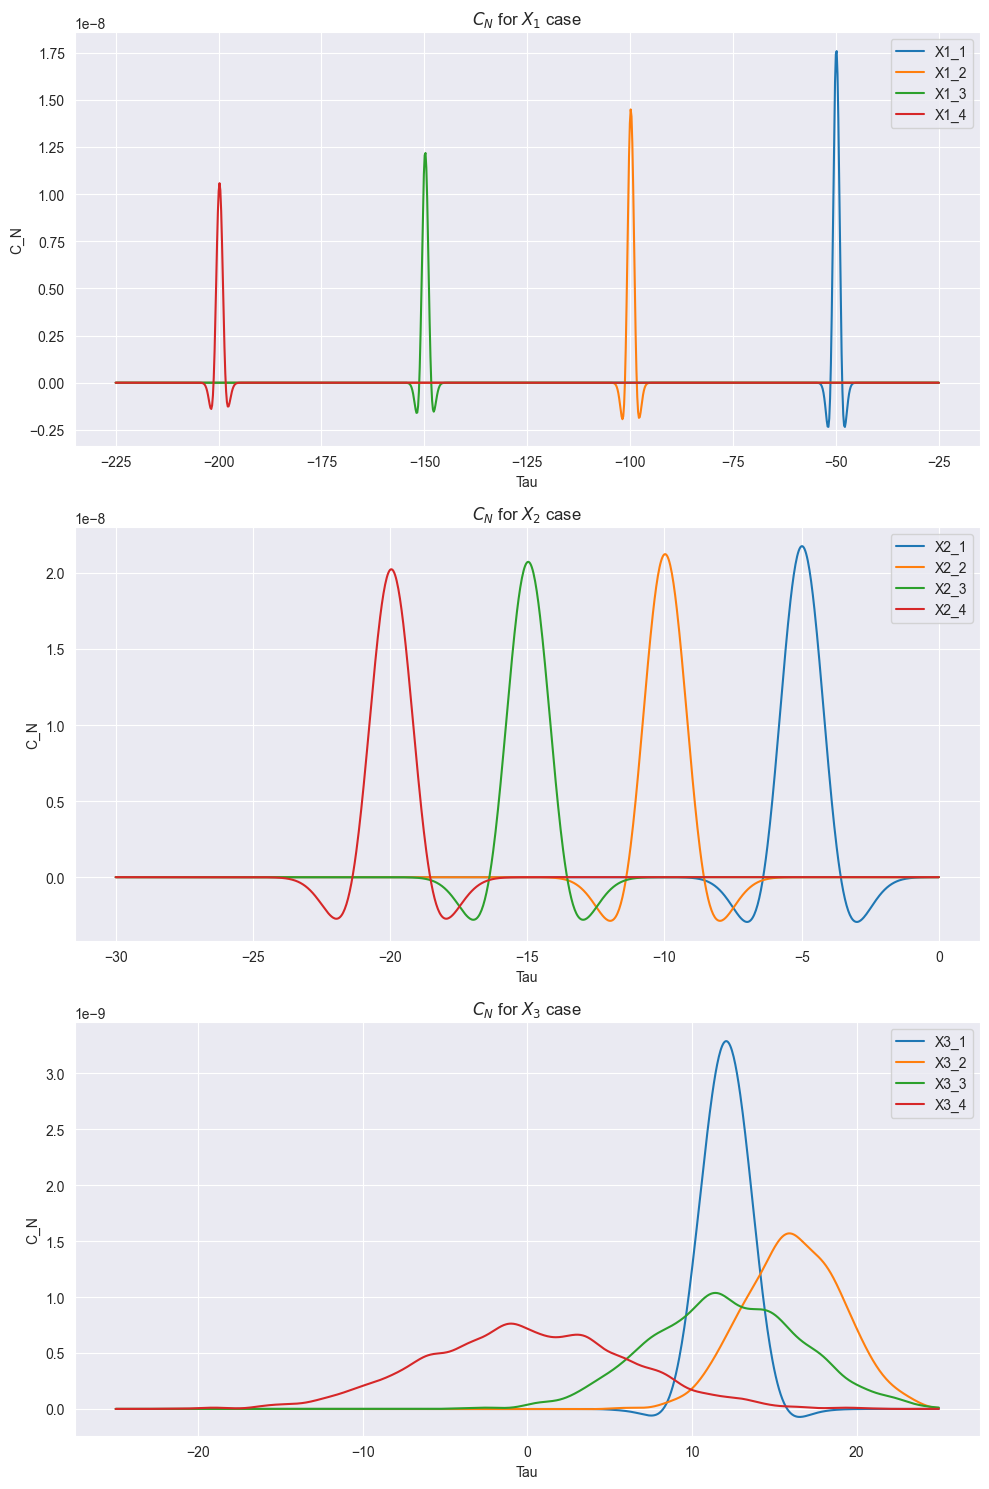

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

X_list = [X_1, X_2, X_3]
titles = ["$C_N$ for $X_1$ case", "$C_N$ for $X_2$ case", "$C_N$ for $X_3$ case"]
Tau = [np.linspace(-225, -25, 1000), np.linspace(-30, 0, 1000), np.linspace(-25, 25, 1000)]

for i, X in enumerate(X_list):
    C_N_values = [np.array([C_N(tau, X[j], X[0], y) for tau in Tau[i]]) for j in range(1, 5)]
    for j, C_N_val in enumerate(C_N_values):
        axs[i].plot(Tau[i], C_N_val, label=f"X{i+1}_{j+1}")
    axs[i].legend()
    axs[i].set_xlabel("Tau")
    axs[i].set_ylabel("C_N")
    axs[i].set_title(titles[i])

plt.tight_layout()
plt.show()


## 2.